# **Imports**

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")


# **Data loading**

In [13]:
# Load Iris Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Full dataset
df = X.copy()
df['species'] = y
df['species_name'] = df['species'].map(dict(zip(range(3), iris.target_names)))

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# **Data Visualisation**

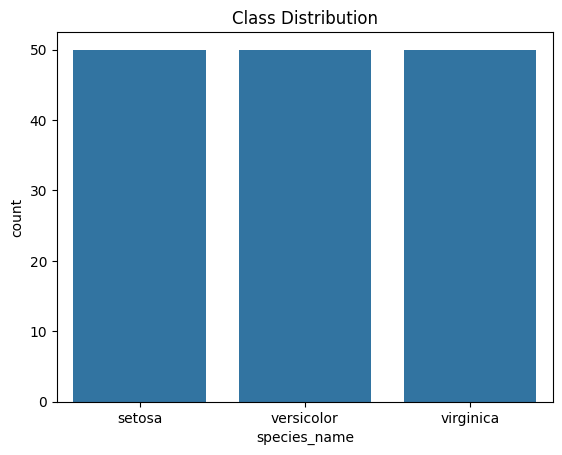

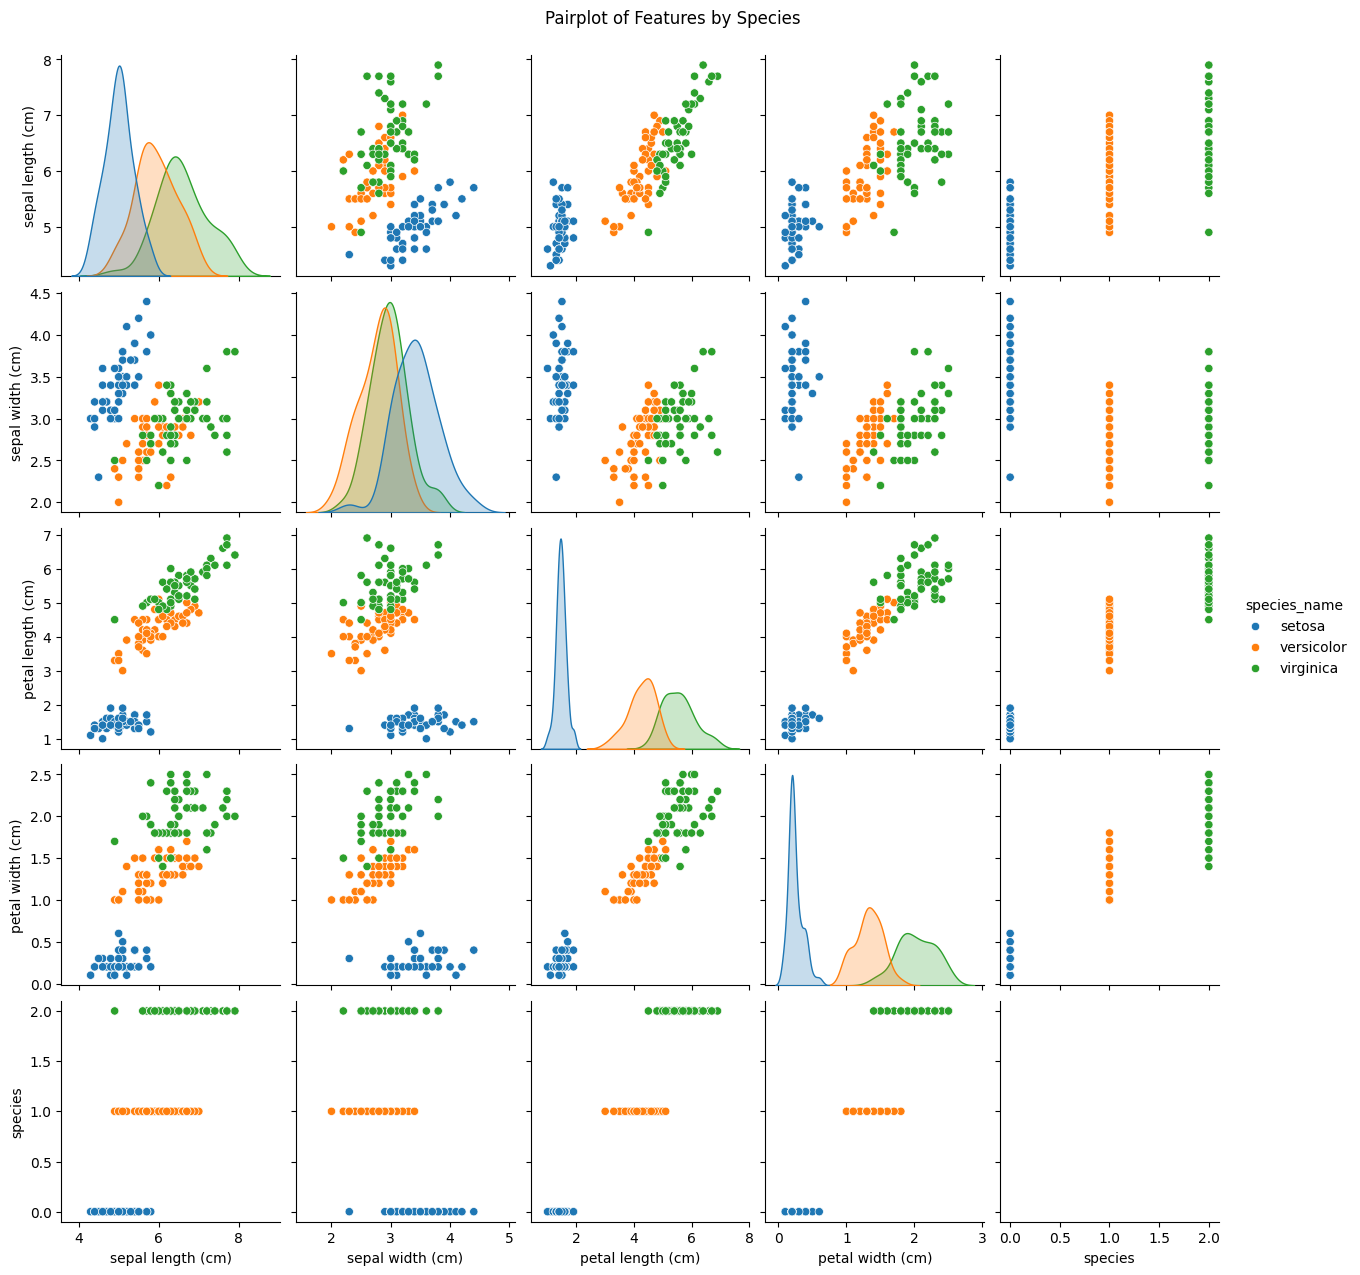

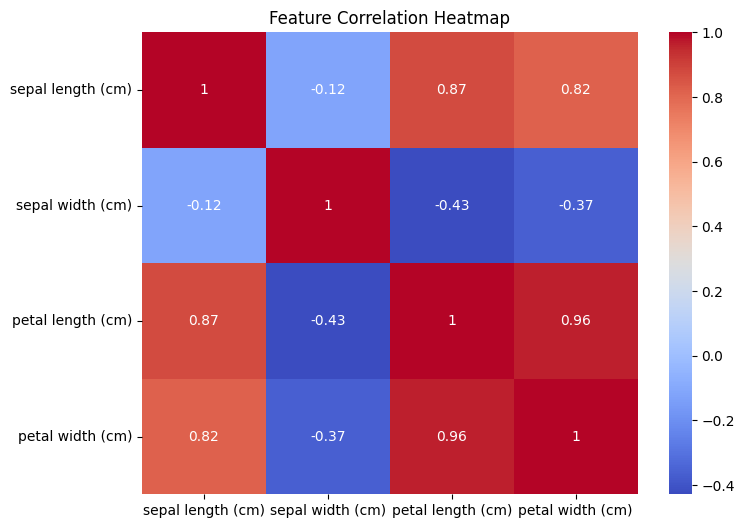

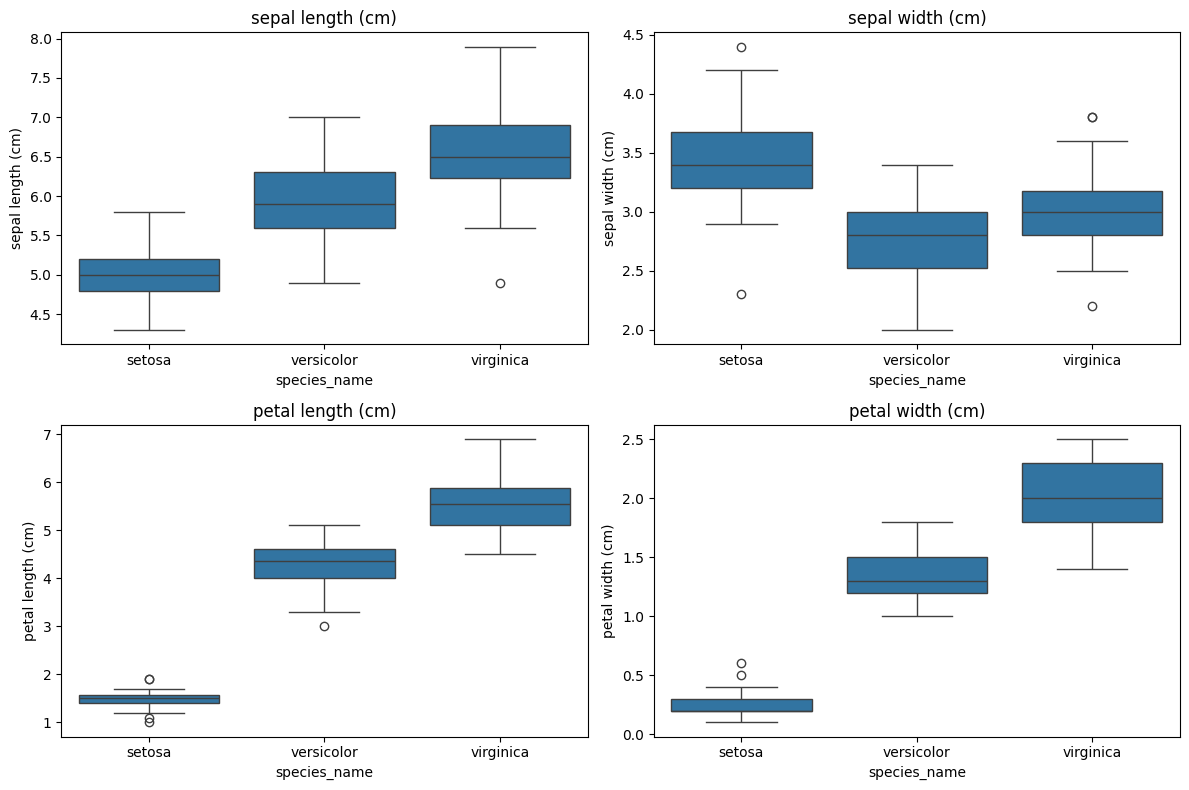

In [23]:
# Class distribution
sns.countplot(x='species_name', data=df)
plt.title("Class Distribution")
plt.show()

# Pairplot
sns.pairplot(df, hue="species_name", diag_kind='kde')
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species_name', y=feature, data=df)
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()

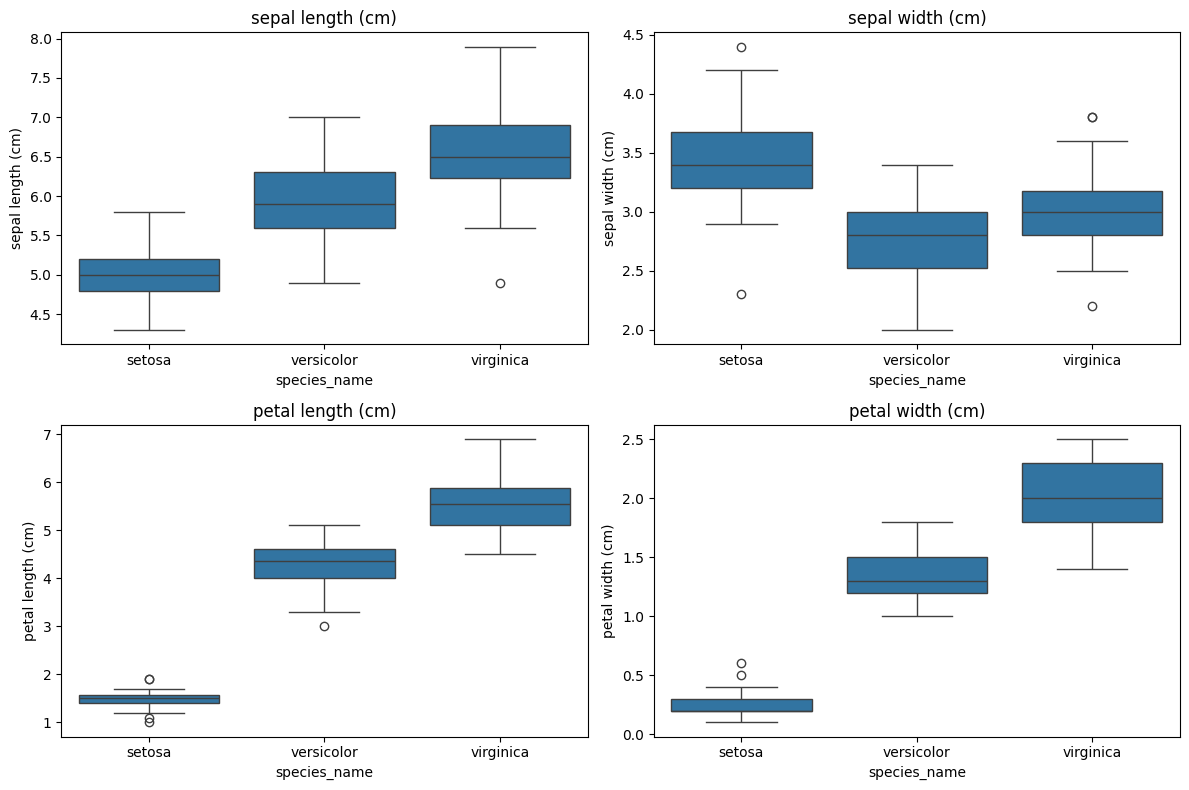

# **Train - Test Split**

In [16]:
# Train-test split
X_data = X.copy()  # already numeric
y_data = y

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, stratify=y_data, random_state=42
)

# Scaling for certain models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Model training and Evaluation**

 Logistic Regression 
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



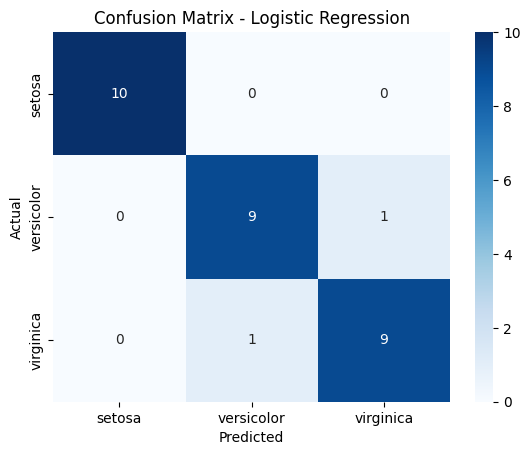

 Random Forest 
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



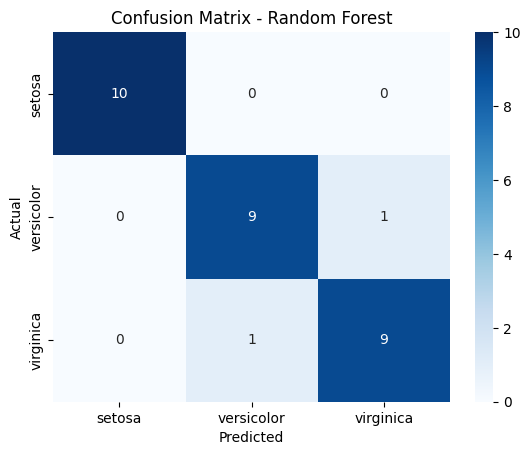

 SVM (RBF Kernel) 
Accuracy: 0.9667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



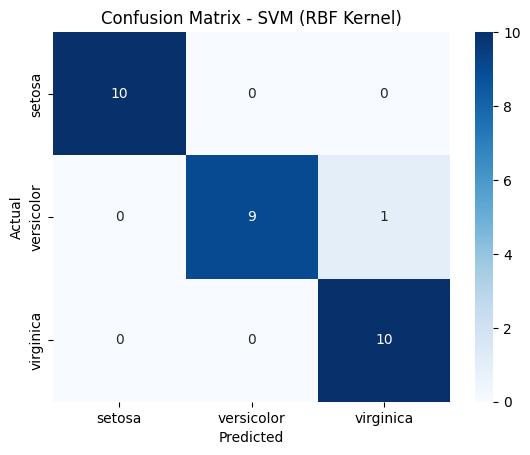

 k-NN 
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



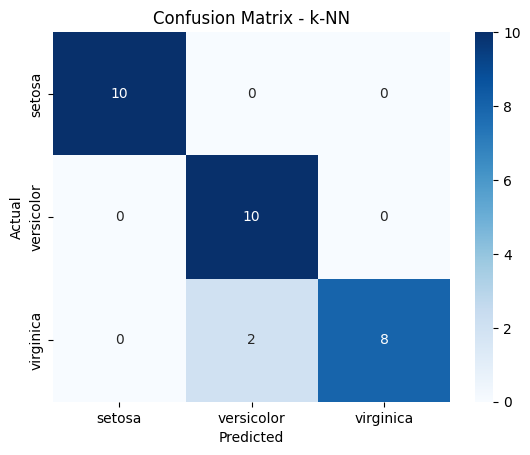

In [25]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "k-NN": KNeighborsClassifier()
}

# Track results
results = []

for name, model in models.items():
    print(f" {name} ")

    # Use scaled or unscaled data depending on algorithm
    if "Random Forest" in name:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        X_cv = X_data
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        X_cv = scaler.transform(X_data)

    acc = accuracy_score(y_test, preds)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=iris.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Cross-validation
    cv_scores = cross_val_score(model, X_cv, y_data, cv=5)
    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "CV Accuracy Mean": np.mean(cv_scores),
        "CV Std": np.std(cv_scores)
    })


# **Compare Model Performances**

                 Model  Test Accuracy  CV Accuracy Mean    CV Std
0     SVM (RBF Kernel)       0.966667          0.966667  0.021082
1  Logistic Regression       0.933333          0.960000  0.038873
2        Random Forest       0.933333          0.960000  0.024944
3                 k-NN       0.933333          0.960000  0.024944


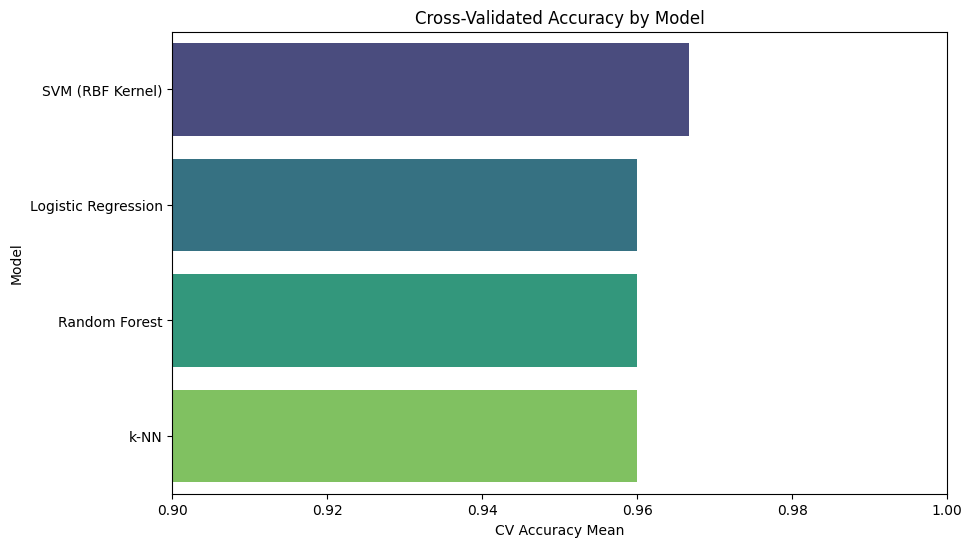

In [18]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="CV Accuracy Mean", ascending=False)
results_df.reset_index(drop=True, inplace=True)

# Display table
print(results_df)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="CV Accuracy Mean", y="Model", data=results_df, palette="viridis")
plt.title("Cross-Validated Accuracy by Model")
plt.xlim(0.9, 1.0)
plt.show()


# **Identify best model based on CV accuracy**

In [19]:
best_model_row = results_df.iloc[0]
best_model_name = best_model_row["Model"]
print(f"\n Best Model Based on CV Accuracy: {best_model_name}")



✅ Best Model Based on CV Accuracy: SVM (RBF Kernel)


# **Re-train best model on Full Data**

In [20]:
# Prepare full training data
if best_model_name == "Random Forest":
    X_final = X_data
    model = RandomForestClassifier()
else:
    X_final = scaler.transform(X_data)
    if best_model_name == "Logistic Regression":
        model = LogisticRegression()
    elif best_model_name == "SVM (RBF Kernel)":
        model = SVC(kernel='rbf')
    elif best_model_name == "k-NN":
        model = KNeighborsClassifier()

# Train on full dataset
model.fit(X_final, y_data)
print("Model trained on full dataset.")


Model trained on full dataset.


# **Prediction based on User Input**

In [24]:
def predict_from_user_input():
    print("\nEnter flower measurements:")

    try:
        sepal_length = float(input("Sepal Length (cm): "))
        sepal_width  = float(input("Sepal Width (cm): "))
        petal_length = float(input("Petal Length (cm): "))
        petal_width  = float(input("Petal Width (cm): "))
    except ValueError:
        print(" Invalid input. Please enter numeric values.")
        return

    input_features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Apply scaling if required
    if best_model_name != "Random Forest":
        input_features = scaler.transform(input_features)

    prediction = model.predict(input_features)[0]
    species_name = iris.target_names[prediction]

    print(f"\n1 Predicted Species: **{species_name.capitalize()}**")

# Call the function
predict_from_user_input()



Enter flower measurements:
Sepal Length (cm): 5
Sepal Width (cm): 8
Petal Length (cm): 13
Petal Width (cm): 5

 Predicted Species: **Setosa**
